In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df = df.drop('id',axis=1)

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['month'] = df['date'].apply(lambda date:date.month)

In [8]:
df['year'] = df['date'].apply(lambda date:date.year)

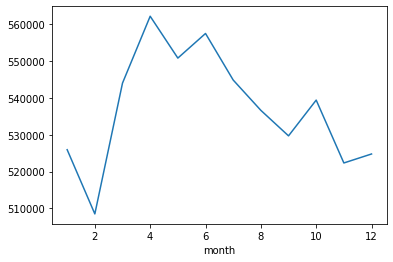

In [9]:
df.groupby('month').mean()['price'].plot();

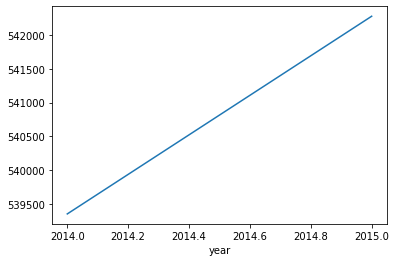

In [10]:
df.groupby('year').mean()['price'].plot();

In [11]:
df = df.drop('date',axis=1)

In [12]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [13]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [14]:
df = df.drop('zipcode',axis=1)

In [15]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

### Train Test Split

In [17]:
X = df.drop('price',axis=1)
y = df['price']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling using MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
full_scaler = MinMaxScaler() 
full_scaler.fit(X)
X = scaler.transform(X)

In [23]:
X_train.min()

0.0

In [24]:
X_train.max()

1.0

In [25]:
X.shape

(21597, 19)

### Principal Component Analysis (PCA)

In [46]:
from sklearn.decomposition import PCA

In [47]:
n_components = 0.95

In [58]:
pca = PCA(n_components = n_components)

In [59]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [61]:
X_train.shape

(15117, 19)

In [62]:
X_train_pca.shape

(15117, 10)

In [63]:
X_test.shape

(6480, 19)

In [64]:
X_test_pca.shape

(6480, 10)

In [65]:
pca = PCA(n_components = n_components)

In [66]:
pca.fit(X)
X_pca = pca.transform(X)

In [67]:
X.shape

(21597, 19)

In [68]:
X_pca.shape

(21597, 10)

In [90]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Cross Validation if data < 100 k

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
lin_reg_cvs = LinearRegression()
lin_scores = cross_val_score(lin_reg_cvs, X_pca, y,
                             scoring="neg_mean_squared_error", cv=10, verbose=0)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [227860.74597446 247810.04621959 205468.78997895 248870.16231172
 202406.85741385 203665.81266296 200769.87732543 207890.45355133
 216109.90756833 238913.00743315]
Mean: 219976.56604397637
Standard deviation: 18290.50187302486


In [73]:
tree_reg_cvs = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg_cvs, X_pca, y,
                         scoring="neg_mean_squared_error", cv=10, verbose=0)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [246608.2363728  280433.07271452 209001.5838789  262408.48353439
 236924.25456652 253037.76352331 210848.99148669 224296.76950798
 258817.50138457 237465.31238342]
Mean: 241984.19693531067
Standard deviation: 21768.12566852023


In [74]:
forest_reg_cvs = RandomForestRegressor(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_reg_cvs, X_pca, y,
                                scoring="neg_mean_squared_error", cv=10, verbose=0)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [172150.79603669 202005.76379307 153752.30961684 185229.69486079
 149314.59187486 166391.08980048 156741.6241164  164077.90575786
 168919.14071085 184166.86884719]
Mean: 170274.97854150174
Standard deviation: 15420.130541204651


In [ ]:
svm_reg_rbf = SVR(kernel="rbf")
svm_rbf_scores = cross_val_score(svm_reg_rbf, X_pca, y, scoring="neg_mean_squared_error", cv=10)
svm_rbf_rmse_scores = np.sqrt(-svm_rbf_scores)
display_scores(svm_rbf_rmse_scores)

In [75]:
#svm_reg_cvs = SVR(kernel="linear")
#svm_scores = cross_val_score(svm_reg_cvs, X_pca, y, scoring="neg_mean_squared_error", cv=10)
#svm_rmse_scores = np.sqrt(-svm_scores)
#display_scores(svm_rmse_scores)

In [76]:
print("RMSE of Lnear Regression:", lin_rmse_scores.mean())
print("RMSE of Decision Tree:", tree_rmse_scores.mean())
print("RMSE of Random Forest:", forest_rmse_scores.mean())
print("RMSE of Support Vector (rbf):", svm_rbf_rmse_scores.mean())
#print("RMSE of Support Vector (linear):", svm_rmse_scores.mean())

RMSE of Lnear Regression: 219976.56604397637
RMSE of Decision Tree: 241984.19693531067
RMSE of Random Forest: 170274.97854150174


In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [79]:
X_pca.shape

(21597, 10)

## Cross Validation if data >= 100 k

In [87]:
from xgboost import XGBRegressor

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
xgb_model = XGBRegressor()
xgb_scores = cross_val_score(xgb_model, X_pca, y,
                             scoring="neg_mean_squared_error", cv=5)

In [91]:
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

Scores: [185622.76770493 176414.83994944 154635.61063056 163577.64126115
 180302.04911108]
Mean: 172110.5817314318
Standard deviation: 11370.062747999338


## Creating a Model with Scikit if data < 100 k

In [50]:
from pprint import pprint

In [151]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [51]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_pca, y_train)
base_accuracy = evaluate(base_model, X_test_pca, y_test)

Model Performance
Average Error: 95683.7967 degrees.
Accuracy = 81.96%.


In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 4, 8, 10],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [2, 4, 8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [56]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 50.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 77.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 97.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 128.0min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 164.3min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [57]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_pca, y_test)

Model Performance
Average Error: 55166.3609 degrees.
Accuracy = 87.74%.


In [58]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.97%.


### Predicting on a brand new house

In [54]:
single_house = df.drop('price',axis=1).iloc[0]

In [55]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [56]:
single_house = pca.transform(single_house)

In [57]:
single_house

array([[  -84.10999106,  -627.88468573,  -126.16578076,    74.73166203,
            3.22399423,   -32.4621464 ,    -6.87844078,   208.20104805,
        -1950.33043487,   176.35104753,    59.8499402 ,  -420.06634312]])

In [58]:
base_model.predict(single_house)
#random_accuracy = evaluate(best_random, test_features, test_labels)

array([3547000.])

In [64]:
best_grid.predict(single_house)

array([231812.36035159])

In [83]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

## Creating a Model with Scikit if data >= 100 k

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [94]:
xgb_reg = XGBRegressor()
xgb_grid = GridSearchCV(xgb_reg,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [95]:
xgb_grid.fit(X_train_pca,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  1.4min finished


[19:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[19:03:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_chil

In [96]:
print(xgb_grid.best_score_)

0.772121481062169


In [97]:
print(xgb_grid.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [98]:
xgb_best_grid = xgb_grid.best_estimator_

In [99]:
xgb_predictions = xgb_best_grid.predict(X_test_pca)

In [100]:
mae = mean_absolute_error(xgb_predictions, y_test)
print("Mean Absolute Error:" , mae)

Mean Absolute Error: 87456.98685619213


### Predicting on a brand new house

In [140]:
import random
random.seed(101)
random_ind = random.randint(0,len(X_test_pca))

single_house = X_test_pca[6001]

In [141]:
X_train_pca.shape

(15117, 10)

In [142]:
single_house.shape

(10,)

In [143]:
single_house = single_house.reshape(-1, 10)

In [144]:
single_house.shape

(1, 10)

In [145]:
single_house

array([[-0.42805279, -0.15975653,  0.04773907, -0.31353064, -0.03022382,
        -0.20048219,  0.15756176, -0.08563807, -0.00430118,  0.01663552]])

In [146]:
xgb_best_grid.predict(single_house)

array([344175.9], dtype=float32)

In [147]:
len(X_test_pca)

6480

In [148]:
len(y_test)

6480

In [150]:
y_test[6001]

464625.0

## Creating a Model with TensorFlow

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [77]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [78]:
model.fit(x=X_train_pca,y=y_train.values,
          validation_data=(X_test_pca,y_test.values),
          batch_size=32,epochs=600,verbose=1,
          callbacks=[early_stop])

Epoch 1/600
473/473 [==============================] - 1s 1ms/step - loss: 419634315264.0000 - val_loss: 373171027968.0000
Epoch 2/600
473/473 [==============================] - 1s 1ms/step - loss: 299662966784.0000 - val_loss: 165668405248.0000
Epoch 3/600
473/473 [==============================] - 1s 2ms/step - loss: 154914979840.0000 - val_loss: 99866230784.0000
Epoch 4/600
473/473 [==============================] - 1s 2ms/step - loss: 120767488000.0000 - val_loss: 77518372864.0000
Epoch 5/600
473/473 [==============================] - 1s 2ms/step - loss: 112722894848.0000 - val_loss: 67957628928.0000
Epoch 6/600
473/473 [==============================] - 1s 1ms/step - loss: 102330777600.0000 - val_loss: 63160971264.0000
Epoch 7/600
473/473 [==============================] - 1s 2ms/step - loss: 98760695808.0000 - val_loss: 59861667840.0000
Epoch 8/600
473/473 [==============================] - 1s 1ms/step - loss: 98636390400.0000 - val_loss: 58547892224.0000
Epoch 9/600
473/473 [===

473/473 [==============================] - 1s 2ms/step - loss: 68069625856.0000 - val_loss: 33891074048.0000
Epoch 135/600
473/473 [==============================] - 1s 2ms/step - loss: 66463645696.0000 - val_loss: 34415067136.0000
Epoch 136/600
473/473 [==============================] - 1s 2ms/step - loss: 71223828480.0000 - val_loss: 34956898304.0000
Epoch 137/600
473/473 [==============================] - 1s 2ms/step - loss: 66227335168.0000 - val_loss: 35734192128.0000
Epoch 138/600
473/473 [==============================] - 1s 2ms/step - loss: 65155936256.0000 - val_loss: 34704203776.0000
Epoch 139/600
473/473 [==============================] - 1s 2ms/step - loss: 68803657728.0000 - val_loss: 35552903168.0000
Epoch 140/600
473/473 [==============================] - 1s 1ms/step - loss: 66802167808.0000 - val_loss: 33547962368.0000
Epoch 141/600
473/473 [==============================] - 1s 2ms/step - loss: 67392069632.0000 - val_loss: 33158051840.0000
Epoch 142/600
473/473 [=======

In [79]:
losses = pd.DataFrame(model.history.history)

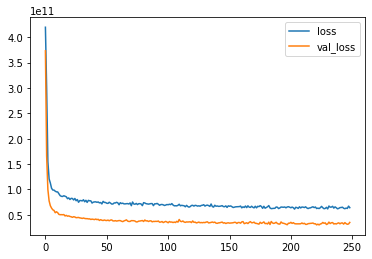

In [80]:
losses.plot()

### Evaluation on Test Data

In [81]:
predictions = model.predict(X_test_pca)

In [82]:
mean_absolute_error(y_test,predictions)

106094.63113425925

In [83]:
np.sqrt(mean_squared_error(y_test,predictions))

186948.27768047192

In [84]:
df['price'].mean()

540296.5735055795

In [98]:
df['price'].median()

430000.0

### Predicting on a brand new house

In [85]:
single_house

array([[ 0.        , -1.66666667, -0.66071429, -0.34496193, -0.5       ,
         0.        ,  0.        ,  0.        ,  0.        , -0.37864078,
         0.        , -0.43478261,  0.        , -0.29626032, -0.12871287,
        -0.56818182, -0.39305778,  0.8       ,  0.        ]])

In [86]:
model.predict(single_house)

array([[271901.53]], dtype=float32)

In [87]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64